# Homework 1

## FINM 36700 - 2024

### UChicago Financial Mathematics

Questions Written by:
* Mark Hendricks
* hendricks@uchicago.edu

Solutions Written by:
* Austin Galm
* agalm@uchicago.edu

## HBS Case

### *The Harvard Management Company and Inflation-Indexed Bonds*

### Notation
(Hidden LaTeX commands)

$$\newcommand{\mux}{\tilde{\boldsymbol{\mu}}}$$
$$\newcommand{\wtan}{\boldsymbol{\text{w}}^{\text{tan}}}$$
$$\newcommand{\wtarg}{\boldsymbol{\text{w}}^{\text{port}}}$$
$$\newcommand{\mutarg}{\tilde{\boldsymbol{\mu}}^{\text{port}}}$$
$$\newcommand{\wEW}{\boldsymbol{\text{w}}^{\text{EW}}}$$
$$\newcommand{\wRP}{\boldsymbol{\text{w}}^{\text{RP}}}$$
$$\newcommand{\wREG}{\boldsymbol{\text{w}}^{\text{REG}}}$$

***

# 1. HMC's Approach

**Section 1 is not graded**, and you do not need to submit your answers. But you are encouraged to think about them, and we will discuss them.

### 1. 
There are thousands of individual risky assets in which HMC can invest.  Explain why MV optimization across 1,000 securities is infeasible.

**Answer:** *The MV solution involves inverting the covariance matrix, $\Sigma^{-1}$. For a large number of securities, we will not have enough data to estimate the $\frac{n (n+1)}{2}$ elements of $\Sigma$ with precision.*

*On a more intuitive level, it is unlikely that a large cross-section of securities will all be relatively uncorrelated with one another. Consequently, there will be some portion of the covariance matrix that contains securities that are highly correlated (either positively or negatively), and this will lead to instability of the covariance matrix because the condition number will soar higher. This instability will result in an inverted covariance matrix that drives infeasible results for the MVO.*

### 2.
Rather than optimize across all securities directly, HMC runs a two-stage optimization.
1. They build asset class portfolios with each one optimized over the securities of the specific asset class.  
2. HMC combines the asset-class portfolios into one total optimized portfolio.

In order for the two-stage optimization to be a good approximation of the full MV-optimization on all assets, what must be true of the partition of securities into asset classes?

**Answer:** *It must be true that the securities within each asset class partition must not have covariances against other asset classes that differ substantially from the average cross-asset-class covariance of the partition. That is, the cross-asset-class covariances of each security in a given asset class partition must be similar. Otherwise, if these individual security covariances were substantially different, then the full MV-optimization on all assets would treat that individual security substantially differently.*

*Beyond this cross-asset correlation issue, we also require some stability in the covariance matrix for the optimized partitions of asset classes. That is, the result of the two-stage optimization may not be a good approximation of the full MV-optimization if, somehow, the optimized asset class portfolios are highly correlated with one another relative to the individual securities. If this were to happen, then it would lead to instability in the covariance matrix at the second stage of the optimization.*

### 3.
Should TIPS form a new asset class or be grouped into one of the other 11 classes?

**Answer:** *This question calls for a two handed economist! On the one hand, separation shows us that there is more diversification between TIPS and Bonds than, say, SPY and many other equity buckets Harvard has. On the other hand, TIPS mostly impacts the allocation to domestic bonds, the asset class bucket that it would most-likely be lumped into when included in the MVO.* 

*Further (on the latter point), the inclusion of TIPS in the MVO analysis doesn't make a meaningful difference to the Sharpe ratio. Consequently, the inclusion of TIPS as a separate asset class does not carry mathematical support for expanding the investment opportunity set.*

### 4. 
Why does HMC focus on real returns when analyzing its portfolio allocation? Is this just a matter of scaling, or does using real returns versus nominal returns potentially change the MV solution?

**Answer:** *First, let us note that real returns are synonymous with excess returns because real returns are simply nominal returns less the risk free rate. With that in mind, the answer to this question becomes immediate--using real returns versus nominal returns does change the MV solution. In theory, the MV solution always looks for a tangency portfolio that passes through the origin of a plot and is tangent to the mean-variance frontier. If we use nominal returns, this has the effect of shifting the mean variance frontier up by some amount. If we then optimize on this shifted frontier, we will produce a different set of optimal weights for the tangency portfolio because the tangent line will have a different slope. But MV analysis is designed to work with excess returns--so plugging the weights from the nominal return analysis into a portfolio and analyzing its Sharpe ratio will yield a lower Sharpe in real terms than if we had used real returns.*

### 5.
The case discusses the fact that Harvard places bounds on the portfolio allocation rather than implementing whatever numbers come out of the MV optimization problem.

How might we adjust the stated optimization problem in the lecture notes to reflect the extra constraints Harvard is using in their bounded solutions given in Exhibits 5 and 6?

**Answer:** *We would adjust the stated optimization problem by adding constraints to the weights for each asset class. Explicitly, we would optimize for*
$$
\begin{array}{rcl}
\min_\omega & \omega' \Sigma \omega \\
\text{s.t. } & \omega' \mu = \mu* \\
\text{s.t. } & \omega^i \geq \alpha^i , & \forall i
\text{s.t. } & \omega^i \leq \beta^i , & \forall i
\end{array}
$$

*where $\alpha^i$ is the minimum holding for each asset class and $\beta^i$ is the maximum holding.* 

*The solution to this system is much more complicated due to all the constraints and is actually not convex. Though MVO is widely used in practice, it is almost always used with constraints like those described above and in the HMC case. Therefore, different methods must be employed to obtain a constrained optimization, and the portfolio weights consequently become sensitive to the constraint specifications.*

### 6. 
Exhibits 5 shows zero allocation to domestic equities and domestic bonds across the entire computed range of targeted returns, (5.75% to 7.25%). Conceptually, why is the constraint binding in all these cases? What would the unconstrained portfolio want to do with those allocations and why?

**Answer:** *The constraint is binding in all these cases because the unconstrained portfolio would want to short each of these securities. Each of these asset classes have meager Sharpe ratios and they each carry some of the greatest correlations with other asset classes. Consequently, the unconstrained optimization would want to short these assets to more meaningfully reduce the covariance in the optimal portfolio and allow the portfolio to go longer in other securities with higher sharpe ratios.*

### 7.
Exhibit 6 changes the constraints, (tightening them in most cases.) How much deterioration do we see in the mean-variance tradeoff that Harvard achieved?

**Answer:** *We do not see that much deterioration in the mean-variance tradeoff from Exhibit 5 to Exhibit 6. Specifically, the Sharpe ratios only decrease from 0.38 to 0.35 in most cases, which is only a ~10% decline in risk-adjusted performance. However, these results are meaningfully lower than an unconstrained solution, which would yield a Sharpe ratio of over 0.8.*

***

# 2 Mean-Variance Optimization

<i>This section is graded for a good-faith effort by your group. Submit your write-up- along with your supporting code. </i>

### Data
You will need the file in the github repo, `data/multi_asset_etf_data.xlsx`.
- The time-series data gives monthly returns for the 11 asset classes and a short-term Treasury-bill fund return, ("SHV",) which we consider as the risk-free rate.
- The data is provided in total returns, (in which case you should ignore the SHV column,) as well as excess returns, (where SHV has been subtracted from the other columns.)
- These are nominal returns-they are not adjusted for inflation, and in our calculations we are not making any adjustment for inflation.
- The exhibit data that comes via Harvard with the case is unnecessary for our analysis.

### Model
We are going to analyze the problem in terms of **excess** returns.
- Thus, you will focus on the `Excess Returns` section of the lecture notes, especially the formulas on slide 50.
- Be sure to use the`excess returns` tab of the data.

### Format
In the questions below, **annualize the statistics** you report.
- Annualize the mean of monthly returns with a scaling of 12.
- Annualize the volatility of monthly returns with a scaling of $\sqrt{12}$
- The Sharpe Ratio is the mean return divided by the volatility of returns. Accordingly, we can annualize the Sharpe Ratio with a scaling of $\sqrt{12}$
- Note that we are not scaling the raw timeseries data, just the statistics computed from it (mean, vol, Sharpe). 

### Footnotes

#### Data File
* The case does not give time-series data, so this data has been compiled outside of the case, and it intends to represent the main asset classes under consideration via various ETFs. For details on the specific securities/indexes, check the “Info” tab of the data.

#### Risk-free rate
* In the lecture-note we considered a constant risk-free rate. It is okay that our risk-free rate changes over time, but the assumption is that investors know it’s value one-period ahead of time. Thus, at any given point in time, it is a risk-free rate for the next period. (This is often discussed as the "bank account" or "money market account" in other settings.

## 1. Summary Statistics
* Calculate and display the mean and volatility of each asset’s excess return. (Recall we use volatility to refer to standard deviation.)
* Which assets have the best and worst Sharpe ratios? Recall that the Sharpe Ratio is simply the ratio of the mean-to-volatility of excess returns:
$$\text{sharpe ratio of investment }i = \frac{\mux_i}{\sigma_i}$$

## 2. Descriptive Analysis
* Calculate the correlation matrix of the returns. Which pair has the highest correlation? And the lowest?
* How well have TIPS done in our sample? Have they outperformed domestic bonds? Foreign bonds?

## 3. The MV frontier.
* Compute and display the weights of the tangency portfolios: $\wtan$.
* Does the ranking of weights align with the ranking of Sharpe ratios?
* Compute the mean, volatility, and Sharpe ratio for the tangency portfolio corresponding to
$\wtan$.

## 4. TIPS
Assess how much the tangency portfolio (and performance) change if...
* TIPS are dropped completely from the investment set.
* The expected excess return to TIPS is adjusted to be 0.0012 higher than what the historic sample shows.

Based on the analysis, do TIPS seem to expand the investment opportunity set, implying that Harvard should consider them as a separate asset?

### Importing Libraries and Loading Data

In [1]:
import pandas as pd
import numpy as np
import os
pd.options.display.float_format = "{:,.4f}".format

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

In [2]:
data_path = os.path.dirname(os.getcwd())
file_path = os.path.join(data_path, 'data/multi_asset_etf_data.xlsx')
multi_asset_etf_descriptions = pd.read_excel(file_path)

multi_asset_etf_prices = pd.read_excel(file_path, sheet_name = 'prices')

multi_asset_etf_tot_ret = pd.read_excel(file_path, sheet_name = 'total returns')
risk_free_rate = multi_asset_etf_tot_ret.loc[:,['SHV']]
multi_asset_etf_tot_ret = multi_asset_etf_tot_ret.drop('SHV', axis = 1)

multi_asset_etf_excess_ret = pd.read_excel(file_path, sheet_name = 'excess returns')
multi_asset_etf_excess_ret.head(2)

,Date,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
0,2011-02-28,0.0065,0.0416,-0.0005,0.0354,0.0143,-0.0022,0.0451,0.0401,0.0025,0.0346,0.0071
1,2011-03-31,0.0083,0.0264,0.0627,-0.0241,0.0003,-0.0017,-0.0111,0.0165,0.0053,-0.0001,0.0117


#### Helper Functions

In [3]:
def summary_statistics_annualized(returns, annual_factor = 12):
    """This functions returns the summary statistics for the input total/excess returns passed
    into the function"""
    
    summary_statistics = pd.DataFrame(index=returns.columns)
    summary_statistics['Mean'] = returns.mean() * annual_factor
    summary_statistics['Vol'] = returns.std() * np.sqrt(annual_factor)
    summary_statistics['Sharpe'] = (returns.mean() / returns.std()) * np.sqrt(annual_factor)
    summary_statistics['Min'] = returns.min()
    summary_statistics['Max'] = returns.max()
    summary_statistics['Skewness'] = returns.skew()
    summary_statistics['Excess Kurtosis'] = returns.kurtosis()
    summary_statistics['VaR (0.05)'] = returns.quantile(.05, axis = 0)
    summary_statistics['CVaR (0.05)'] = returns[returns <= returns.quantile(.05, axis = 0)].mean()
    
    return summary_statistics

In [4]:
def tangency_weights(returns, cov_mat = 1):
    
    returns = returns.drop('Date', axis=1)
    if cov_mat ==1:
        cov_inv = np.linalg.inv((returns.cov()*12))
    else:
        cov = returns.cov()
        covmat_diag = np.diag(np.diag((cov)))
        covmat = cov_mat * cov + (1-cov_mat) * covmat_diag
        cov_inv = np.linalg.inv((covmat*12))  
        
    ones = np.ones(returns.columns.shape) 
    mu = returns.mean()*12
    scaling = 1/(np.transpose(ones) @ cov_inv @ mu)
    tangent_return = scaling*(cov_inv @ mu) 
    tangency_wts = pd.DataFrame(index = returns.columns, data = tangent_return, columns = ['Tangent Weights'] )
        
    return tangency_wts

In [5]:
def gmv_weights(tot_returns):
    
    ones = np.ones(tot_returns.columns.shape)
    cov = tot_returns.cov()*12
    cov_inv = np.linalg.inv(cov)
    scaling = 1/(np.transpose(ones) @ cov_inv @ ones)
    gmv_tot = scaling * cov_inv @ ones
    gmv_wts = pd.DataFrame(index = tot_returns.columns, data = gmv_tot, columns = ['GMV Weights'] )

    
    return gmv_wts

In [6]:
def mv_portfolio(target_ret, tot_returns):
    
    mu_tan = tot_returns.mean() @ tangency_weights(tot_returns, cov_mat = 1)
    mu_gmv = tot_returns.mean() @ gmv_weights(tot_returns)
    
    delta = (target_ret - mu_gmv[0])/(mu_tan[0] - mu_gmv[0])
    mv_weights = (delta * tangency_weights(tot_returns, cov_mat = 1)).values + ((1-delta)*gmv_weights(tot_returns)).values
    
    MV = pd.DataFrame(index = tot_returns.columns, data = mv_weights, columns = ['MV Weights'] )
    MV['tangency weights'] =  tangency_weights(tot_returns, cov_mat = 1).values
    MV['GMV weights'] =   gmv_weights(tot_returns).values


    return MV

#### 2.1

##### Summary Statistics:

In [7]:
excess_returns = multi_asset_etf_excess_ret.drop('Date', axis=1)
excess_returns.describe()

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
count,164.0000,164.0000,164.0000,164.0000,164.0000,164.0000,164.0000,164.0000,164.0000,164.0000,164.0000
mean,-0.0010,-0.0008,0.0022,0.0046,0.0031,0.0012,0.0065,0.0077,0.0012,0.0106,0.0014
std,0.0236,0.0486,0.0519,0.0439,0.0223,0.0182,0.0490,0.0621,0.0141,0.0413,0.0148
min,-0.0694,-0.1776,-0.1791,-0.1452,-0.1044,-0.0476,-0.2005,-0.2789,-0.0605,-0.1290,-0.0676
25%,-0.0135,-0.0311,-0.0304,-0.0227,-0.0066,-0.0099,-0.0239,-0.0234,-0.0074,-0.0132,-0.0071
50%,0.0015,-0.0012,0.0036,0.0080,0.0040,-0.0003,0.0101,0.0144,0.0020,0.0147,0.0028
75%,0.0133,0.0356,0.0320,0.0319,0.0135,0.0114,0.0368,0.0441,0.0089,0.0356,0.0097
max,0.0780,0.1022,0.1628,0.1429,0.0850,0.0461,0.1320,0.1784,0.0364,0.1268,0.0422


##### Sharpe Ratios

In [8]:
sharpes = (multi_asset_etf_excess_ret.drop('Date', axis=1).mean() / multi_asset_etf_excess_ret.drop('Date', axis=1).std()) * np.sqrt(12)
sharpes

BWX   -0.1456
DBC   -0.0539
EEM    0.1498
EFA    0.3616
HYG    0.4833
IEF    0.2206
IYR    0.4594
PSP    0.4314
QAI    0.3052
SPY    0.8876
TIP    0.3286
dtype: float64

In [9]:
print(f'The asset with the highest sharpe is:') 
display(sharpes[sharpes == sharpes.max()])
print('the asset with the lowest sharpe is:')
display(sharpes[sharpes == sharpes.min()])

The asset with the highest sharpe is:


SPY   0.8876
dtype: float64

the asset with the lowest sharpe is:


BWX   -0.1456
dtype: float64

##### Extra Interesting Stats

In [10]:
summary_stats_excess_returns = summary_statistics_annualized(excess_returns, annual_factor = 12)
summary_stats_excess_returns

,Mean,Vol,Sharpe,Min,Max,Skewness,Excess Kurtosis,VaR (0.05),CVaR (0.05)
BWX,-0.0119,0.0817,-0.1456,-0.0694,0.0780,-0.1848,0.7144,-0.0433,-0.0526
DBC,-0.0091,0.1685,-0.0539,-0.1776,0.1022,-0.4917,0.7081,-0.0834,-0.1131
EEM,0.0270,0.1799,0.1498,-0.1791,0.1628,-0.1047,1.2770,-0.0784,-0.1111
EFA,0.0550,0.1522,0.3616,-0.1452,0.1429,-0.2665,0.9672,-0.0733,-0.0966
HYG,0.0374,0.0773,0.4833,-0.1044,0.0850,-0.4828,4.2996,-0.0274,-0.0490
IEF,0.0139,0.0632,0.2206,-0.0476,0.0461,-0.0296,0.0983,-0.0301,-0.0387
IYR,0.0779,0.1696,0.4594,-0.2005,0.1320,-0.4587,1.4781,-0.0679,-0.1006
PSP,0.0929,0.2152,0.4314,-0.2789,0.1784,-0.6416,2.5747,-0.1003,-0.1400
QAI,0.0150,0.0490,0.3052,-0.0605,0.0364,-0.5388,2.0185,-0.0190,-0.0317
SPY,0.1270,0.1431,0.8876,-0.1290,0.1268,-0.4076,0.8588,-0.0655,-0.0854


#### 2.2

##### Correlations

<Axes: >

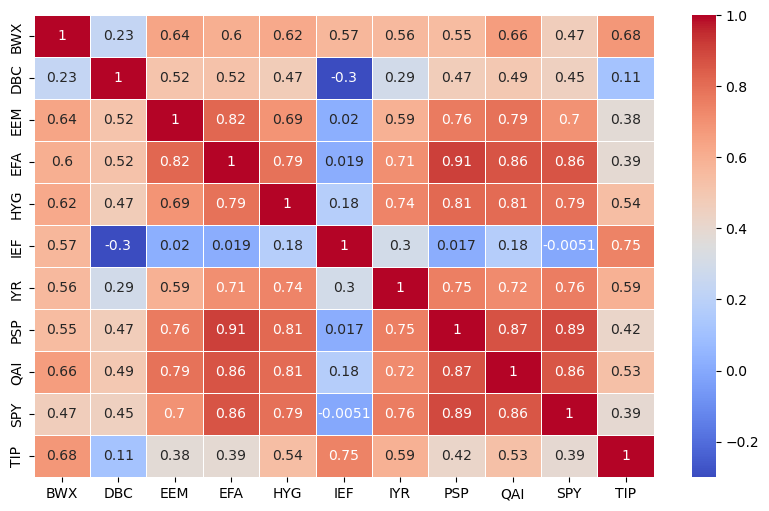

In [11]:
fig, ax = plt.subplots(figsize=(10,6))
correlation_matrix = excess_returns.corr()
sns.heatmap(correlation_matrix, 
            annot=True,
            cmap='coolwarm',
            xticklabels=correlation_matrix.columns,
            yticklabels=correlation_matrix.columns, 
            linewidths=0.5)

In [12]:
corr_rank = correlation_matrix.unstack().sort_values().to_frame('Correlations')
corr_rank = corr_rank[corr_rank['Correlations']!=1]
pair_max = corr_rank.index[-1]
pair_min = corr_rank.index[0]

print(f'MIN Correlation pair is {pair_min}')
print(f'MAX Correlation pair is {pair_max}')

MIN Correlation pair is ('DBC', 'IEF')
MAX Correlation pair is ('PSP', 'EFA')


##### TIPS

In [13]:
print('Correlations:')
display(correlation_matrix[correlation_matrix.index == 'TIP'])
print('Descriptive Stats:')
display(excess_returns[['TIP','BWX','IEF', 'HYG']].describe())
print('Interesting Stats:')
display(summary_stats_excess_returns[summary_stats_excess_returns.index.isin(['TIP','BWX','IEF', 'HYG'])])

Correlations:


,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
TIP,0.6800,0.1144,0.3795,0.3867,0.5418,0.7450,0.5908,0.4159,0.5277,0.3936,1.0000


Descriptive Stats:


,TIP,BWX,IEF,HYG
count,164.0000,164.0000,164.0000,164.0000
mean,0.0014,-0.0010,0.0012,0.0031
std,0.0148,0.0236,0.0182,0.0223
min,-0.0676,-0.0694,-0.0476,-0.1044
25%,-0.0071,-0.0135,-0.0099,-0.0066
50%,0.0028,0.0015,-0.0003,0.0040
75%,0.0097,0.0133,0.0114,0.0135
max,0.0422,0.0780,0.0461,0.0850


Interesting Stats:


,Mean,Vol,Sharpe,Min,Max,Skewness,Excess Kurtosis,VaR (0.05),CVaR (0.05)
BWX,-0.0119,0.0817,-0.1456,-0.0694,0.0780,-0.1848,0.7144,-0.0433,-0.0526
HYG,0.0374,0.0773,0.4833,-0.1044,0.0850,-0.4828,4.2996,-0.0274,-0.0490
IEF,0.0139,0.0632,0.2206,-0.0476,0.0461,-0.0296,0.0983,-0.0301,-0.0387
TIP,0.0168,0.0513,0.3286,-0.0676,0.0422,-0.6771,2.7363,-0.0214,-0.0331


TIPS have outperformed domestic and foreign bonds on both an absolute (mean returns) and risk-adjusted (sharpe) basis. 
* TIPS provide higher aboslute excess returns than both domestic (`BWX`) and foriegn (`IEF`) bonds, and
* They have performed with less volatility. 

This makes them very attractive relative to these peer groups. TIPS also provide a diversification benefit 
* They provide greater diversification than domestic bonds due to lower relative cross-asset class correlations 
* They provide less benefit than international bonds along this same evaluation metric. 
* Its also worth noting that TIPS are less correlated with their bond peers than most equities are correlated with their equity peers.

Consequently, when considering adding this asset class to a portfolio, trimming down relatively more domestic bonds and equity exposures would provide the greatest diversification benefit. 

***

#### 2.3

In [14]:
w_t = tangency_weights(multi_asset_etf_excess_ret)
mv_frontier = w_t.merge(summary_stats_excess_returns['Sharpe'], on=w_t.index).rename(columns={'key_0':'assets'}).set_index('assets')
mv_frontier.sort_values(by='Sharpe', ascending=True)

,Tangent Weights,Sharpe
assets,,
BWX,2.7303,-0.1456
DBC,-0.1112,-0.0539
EEM,-0.6157,0.1498
IEF,-4.6825,0.2206
QAI,7.2206,0.3052
TIP,0.5104,0.3286
EFA,0.5307,0.3616
PSP,0.2770,0.4314
IYR,0.8771,0.4594


The tangency ranks are substantially different from the Sharpe ranks. For example, the bottom ranked ETF by tangent weights is the `SPY`, which is the top ranked ETF by Sharpe. Additionally, the top ranked ETF by tangent weights is the `QAI`, which is ranked in the lower half of ETFs by Sharpe.

In [15]:
w_tan_summary_statistics = summary_statistics_annualized(excess_returns @ w_t , annual_factor = 12)
w_tan_summary_statistics

,Mean,Vol,Sharpe,Min,Max,Skewness,Excess Kurtosis,VaR (0.05),CVaR (0.05)
Tangent Weights,-0.5273,0.3285,-1.6050,-0.2935,0.2436,-0.0518,0.1059,-0.1980,-0.2447


Interestingly, the sharpe ratio is negative. Technically, this means that the tangency portfolio lies on the "inefficient" frontier and, consequently, we would actually want to short the tangency portfolio and go extra long in the risk-free asset to realize the optimal risk-return tradeoff this combination of assets offers. 

***More on this below!***

#### 2.4

##### Summarizing all summary stats

In [16]:
# Tangent Portfolio Weights for each Scenario
    # Without TIPS
w_t_without_tips = tangency_weights(multi_asset_etf_excess_ret.drop(columns=['TIP']))
w_t_without_tips.columns = ['Tangency Weights with TIPS dropped']

    # Adjusted TIPS
TIP_adj = 0.0012
multi_asset_etf_excess_ret_adj = multi_asset_etf_excess_ret.copy()
multi_asset_etf_excess_ret_adj['TIP'] += TIP_adj
w_t_adj_tips = tangency_weights(multi_asset_etf_excess_ret_adj)
w_t_adj_tips.columns = ['Tangency weights with TIPS adjusted']

wts_summary = mv_frontier[['Sharpe', 'Tangent Weights']].merge(w_t_without_tips, how='left', left_index=True, right_index=True)
wts_summary = wts_summary.merge(w_t_adj_tips, how='right', left_index=True, right_index=True)
display(wts_summary)

# Summary Statistics for each Scenario
    # Without TIPS
w_tan_wo_tips_summary_statistics = summary_statistics_annualized(excess_returns.drop(columns=['TIP']) @ w_t_without_tips , annual_factor = 12)
w_tan_wo_tips_summary_statistics.index = ['Tangency Weights with TIPS dropped']

    # Adjusted TIPS
w_tan_adj_tips_summary_statistics = summary_statistics_annualized(multi_asset_etf_excess_ret_adj[multi_asset_etf_excess_ret_adj.columns[1:]] @ w_t_adj_tips , annual_factor = 12)
w_tan_adj_tips_summary_statistics.index = ['Tangency Weights with TIPS adjusted']

display(pd.concat([w_tan_summary_statistics,w_tan_wo_tips_summary_statistics,w_tan_adj_tips_summary_statistics]))

,Sharpe,Tangent Weights,Tangency Weights with TIPS dropped,Tangency weights with TIPS adjusted
BWX,-0.1456,2.7303,3.0159,29.2601
DBC,-0.0539,-0.1112,-0.0910,1.7716
EEM,0.1498,-0.6157,-0.6642,-5.1230
EFA,0.3616,0.5307,0.5406,1.4514
HYG,0.4833,-0.8326,-0.8716,-4.4601
IEF,0.2206,-4.6825,-4.8324,-18.6046
IYR,0.4594,0.8771,0.9902,11.3761
PSP,0.4314,0.2770,0.3249,4.7252
QAI,0.3052,7.2206,7.9769,77.4621
SPY,0.8876,-4.9041,-5.3893,-49.9636


,Mean,Vol,Sharpe,Min,Max,Skewness,Excess Kurtosis,VaR (0.05),CVaR (0.05)
Tangent Weights,-0.5273,0.3285,-1.6050,-0.2935,0.2436,-0.0518,0.1059,-0.1980,-0.2447
Tangency Weights with TIPS dropped,-0.5808,0.3621,-1.6039,-0.3317,0.2668,-0.0850,0.1627,-0.2207,-0.2723
Tangency Weights with TIPS adjusted,-6.1740,3.6558,-1.6888,-3.8923,2.3362,-0.3432,0.7152,-2.4382,-2.9191


**Conclusion for Harvard:** Zeroing in on the cases where the TIPS are included or Excluded from the portfolio, we can conclude that breaking out TIPS as a separate asset class does not meaningfully change the investment opportunity set. Specifically, we can notice in the bottom table above that the Mean and the Vol differ only slightly and, by extension, so does the Sharpe ratio. Therefore, breaking out TIPS as a separate investable asset class in the portfolio does not seem to offer meaningfully different investment outcomes with the given data set.

On the other hand, it is interesting to consider the last scenario we've analyzed, with the TIPS returns only 12 hundredths of a basis point higher. This outcome could lead one to consider that breaking out TIPS as a separate asset class may actually be worthwhile. However, looking under the hood of the MVO analysis reveals that this scenario actually just highlights the sensitivity of MVO. This sensitivity is highlighted loudly by the tangency portfolio weights in the "Tangency weights with TIPS adjusted" column in the first table above.We can see that the small change in the return profile of TIPS led to a tangency portfolio that has absolute exposure across asset classes leveraged to 251x the original capital of the portfolio. Such a result is operationally infeasible in the real world and highlights one of the shortcomings of MVO--sensitivity.

**Addressing Negative Sharpe Ratios:** The result of having negative sharpe ratios is very interesting, and worth investigating to understand more deeply. At first glance, these results may seem incorrect, but investigation reveals that the above result is indeed accurate. To aid in explanation, we provide the following interactive tool.

In [17]:

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import FloatSlider, HBox, VBox, interactive_output
import ipywidgets as widgets

def plot_efficient_frontier(
        mu1, mu2, mu3, var1, var2, var3, corr12, corr13, corr23,
        min_alpha, max_alpha, cml_slope,
        x_min, x_max, y_min, y_max,
        cml_slope_multiplier,
        cml_alpha
    ):
    # Means (Expected returns)
    mu = np.array([mu1, mu2, mu3])
    
    # Variances
    var = np.array([var1, var2, var3])
    
    # Covariance matrix
    cov = np.zeros((3, 3))
    np.fill_diagonal(cov, var)
    cov[0, 1] = corr12 * np.sqrt(var[0] * var[1])
    cov[1, 0] = cov[0, 1]
    cov[0, 2] = corr13 * np.sqrt(var[0] * var[2])
    cov[2, 0] = cov[0, 2]
    cov[1, 2] = corr23 * np.sqrt(var[1] * var[2])
    cov[2, 1] = cov[1, 2]
    
    # Inverse of covariance matrix
    try:
        cov_inv = np.linalg.inv(cov)
    except np.linalg.LinAlgError:
        print("Covariance matrix is singular and cannot be inverted.")
        return
    
    ones = np.ones(len(mu))
    
    # Recalculate the tangency portfolio weights
    weights_tangency = cov_inv @ mu
    weights_tangency /= np.sum(weights_tangency)
    
    # Recalculate the GMV portfolio weights
    weights_gmv = cov_inv @ ones
    weights_gmv /= np.sum(weights_gmv)
    
    # Generate efficient frontier by combining tangency and GMV portfolios
    alphas = np.linspace(min_alpha, max_alpha, 10_000)  # Allows for extrapolation beyond the two portfolios
    returns = []
    variances = []
    
    for alpha in alphas:
        weights = alpha * weights_tangency + (1 - alpha) * weights_gmv
        port_return = np.dot(weights, mu)
        port_variance = np.dot(weights.T, np.dot(cov, weights))
        returns.append(port_return)
        variances.append(port_variance)
    
    returns = np.array(returns)
    variances = np.array(variances)
    
    # Risk-free rate (assuming zero for excess return)
    risk_free_rate = 0
    
    # Calculate Sharpe Ratios
    with np.errstate(divide='ignore', invalid='ignore'):
        sharpe_ratios = (returns - risk_free_rate) / np.sqrt(variances)
    
    # Identify tangency portfolio (maximum Sharpe Ratio)
    max_sharpe_idx = np.argmax(sharpe_ratios)
    max_sharpe_var = variances[max_sharpe_idx]
    max_sharpe_ret = returns[max_sharpe_idx]
    
    # Plot Efficient Frontier
    plt.figure(figsize=(8, 6))
    plt.plot(variances, returns - risk_free_rate, 'b--', label='Efficient Frontier')
    
    # Plot Capital Market Line (CML)
    # CML is the line from (0, 0) to the tangency portfolio, extended
    cml_x = np.linspace(0, x_max, 500)
    cml_y = cml_slope * cml_slope_multiplier * cml_x
    plt.plot(cml_x, cml_y, color='r', label=f'MV + RF Opt. {(cml_slope * cml_slope_multiplier):.2f}', alpha=cml_alpha)
    plt.plot(cml_x, -cml_y, color='r', alpha=cml_alpha)
    
    # Mark Tangency and GMV Portfolios
    # plt.scatter([max_sharpe_var], [max_sharpe_ret - risk_free_rate], color='g', label='Tangency Portfolio')
    gmv_return = np.dot(weights_gmv, mu)
    gmv_variance = np.dot(weights_gmv.T, np.dot(cov, weights_gmv))
    plt.scatter([gmv_variance], [gmv_return - risk_free_rate], color='orange', label=f'GMV Portfolio ({gmv_variance:.1%}, {gmv_return:.1%})')

    plt.axhline(y=0, linestyle='--', color='black', alpha=0.5)
    plt.scatter([var1], [mu1], color='purple', label=f'Asset 1 ({var1:.1%}, {mu1:.1%})')
    plt.scatter([var2], [mu2], color='green', label=f'Asset 2 ({var2:.1%}, {mu2:.1%})')
    plt.scatter([var3], [mu3], color='yellow', label=f'Asset 3 ({var3:.1%}, {mu3:.1%})')
    
    # Set x and y limits
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    # Labels and Title
    weights_tangency_str = ", ".join([f"{w:.0%}" for w in weights_tangency])
    weights_gmv_str = ", ".join([f"{w:.0%}" for w in weights_gmv])
    plt.xlabel(f'Variance; Weights Tangency: {weights_tangency_str}; Weights GMV: {weights_gmv_str}')
    plt.ylabel('Excess Return (Expected Return - Risk-Free Rate)')
    plt.title('Efficient Frontier with Capital Market Line')
    plt.legend()
    plt.grid(True)
    plt.show()

# Create interactive widgets for parameters
mu1_slider = FloatSlider(value=0.04, min=-0.20, max=0.20, step=0.01, description='Mean 1')
mu2_slider = FloatSlider(value=0.15, min=-0.20, max=0.20, step=0.01, description='Mean 2')
mu3_slider = FloatSlider(value=0.05, min=-0.20, max=0.20, step=0.01, description='Mean 3')

var1_slider = FloatSlider(value=0.02, min=0.0001, max=0.10, step=0.0001, description='Var 1')
var2_slider = FloatSlider(value=0.03, min=0.0001, max=0.10, step=0.0001, description='Var 2')
var3_slider = FloatSlider(value=0.015, min=0.0001, max=0.10, step=0.0001, description='Var 3')

corr12_slider = FloatSlider(value=0.2, min=-1, max=1, step=0.05, description='Corr 1-2')
corr13_slider = FloatSlider(value=0.1, min=-1, max=1, step=0.05, description='Corr 1-3')
corr23_slider = FloatSlider(value=0.3, min=-1, max=1, step=0.05, description='Corr 2-3')

min_alpha_slider = FloatSlider(value=-5, min=-10, max=0, step=1, description='Min Delta')
max_alpha_slider = FloatSlider(value=10, min=1, max=20, step=1, description='Max Delta')
cml_slope_slider = FloatSlider(value=8.4, min=-10, max=10, step=0.1, description='MV RF Line')
cml_slope_multiplier_slider = FloatSlider(value=1, min=0.1, max=3, step=0.1, description='Mult')

x_min_slider = FloatSlider(value=0, min=0, max=0.1, step=0.005, description='X-axis Min')
x_max_slider = FloatSlider(value=0.05, min=0.005, max=0.2, step=0.001, description='X-axis Max')
y_min_slider = FloatSlider(value=0, min=-1, max=0, step=0.01, description='Y-axis Min')
y_max_slider = FloatSlider(value=0.24, min=0, max=1, step=0.01, description='Y-axis Max')
cml_alpha_slider = FloatSlider(value=0, min=0, max=1, step=1, description='MV RF On')

# Organize sliders into groups for better layout
sliders_column1 = VBox([mu1_slider, mu2_slider, mu3_slider, var1_slider, var2_slider, var3_slider, corr12_slider, corr13_slider, corr23_slider, min_alpha_slider, max_alpha_slider])
sliders_column2 = VBox([cml_slope_slider, cml_slope_multiplier_slider, x_min_slider, x_max_slider, y_min_slider, y_max_slider, cml_alpha_slider])

controls = HBox([sliders_column1, sliders_column2])

# Use interactive_output to connect the function with the widgets
out = interactive_output(plot_efficient_frontier, {
    'mu1': mu1_slider,
    'mu2': mu2_slider,
    'mu3': mu3_slider,
    'var1': var1_slider,
    'var2': var2_slider,
    'var3': var3_slider,
    'corr12': corr12_slider,
    'corr13': corr13_slider,
    'corr23': corr23_slider,
    'min_alpha': min_alpha_slider,
    'max_alpha': max_alpha_slider,
    'cml_slope': cml_slope_slider,
    'cml_slope_multiplier': cml_slope_multiplier_slider,
    'x_min': x_min_slider,
    'x_max': x_max_slider,
    'y_min': y_min_slider,
    'y_max': y_max_slider,
    'cml_alpha': cml_alpha_slider
})

# Display the controls and the plot side by side
ui = HBox([controls, out])

display(ui)

The tool allows the user to construct different efficient frontiers and find a tangency portfolio with the RF rate. The default setting I've entered gives a demonstration of what is happening in our specific case. We are realizing a negative sharpe ratio from our MVO because the GMV portfolio has a negative excess return. This can be shown with a simple calculation:

In [18]:
excess_returns.mean() @ gmv_weights(excess_returns) * 12

GMV Weights   -0.0033
dtype: float64

This is telling us that the annualized mean excess returns of the GMV portfolio are -0.0033%, which will then lead to a negative sharpe ratio as mentioned earlier. 

The math behind this conclusion is as follows: With a risk-free rate available, the formula for the excess-return tangency portfolio is 
$$
\mathbf{\omega^t} = \mathbf{\Sigma^{-1}} \mathbf{\tilde{\mu}} c_{tan}
$$

where 
$c_{tan}$ is a scaling constant ensuring the weights sum to 1.

Thus, the mean excess return of the tangency is,
$$
\mathbf{\tilde{\mu}^t} = \mathbf{\tilde{\mu}}' \mathbf{w}^t = \mathbf{\tilde{\mu}}' \mathbf{\Sigma^{-1}} \mathbf{\tilde{\mu}} c_{tan}
$$

This is a scaled quadratic form, with Sigma as a positive definite matrix. The quadratic form must be positive given that 
$\mathbf{\Sigma}$ is positive definite. However, the scaling constant 
$c_{tan}$ may be negative, leading the entire expression to be negative.

When will the constant 
$c_{tan}$ be negative?
$$
c_{tan} = (\mathbf{1}' \mathbf{\Sigma^{-1}} \mathbf{\tilde{\mu}})^{-1}
$$

and we can show that this is negative if and only if the mean (excess) return of the GMV portfolio is negative,
$$
\tilde{\mu}^v = \mathbf{\tilde{\mu}}' \mathbf{w}^v = \mathbf{\tilde{\mu}}' \Sigma^{-1} \mathbf{1} c_{gmv} = \frac{c_{gmv}}{c_{tan}}
$$

where 
$$
c_{gmv} = (\mathbf{1}' \mathbf{\Sigma^{-1}} \mathbf{1})^{-1} > 0
$$

where the positivity condition follows from 
$\mathbf{\Sigma}$ being positive definite.

Thus, 
$\tilde{\mu}^v$ must have the same sign as 
$c_{tan}$, which has the same sign as 
$\tilde{\mu}^t$.

Thus, the tangency will have negative mean (excess) return if, and only if, the GMV mean (excess) return is negative.

# 3. Allocations

<i>This section is graded for a good-faith effort by your group. Submit your write-up- along with your supporting code.

* Continue with the same data file as the previous section.

* Suppose the investor has a targeted mean excess return (per month) of $\mutarg$ = 0.01.

Build the following portfolios:

#### Equally-weighted (EW)
Rescale the entire weighting vector to have target mean $\mutarg$. Thus, the $i$ element of the weight vector is,
$$\wEW_i = \frac{1}{n}$$

#### “Risk-parity” (RP)
Risk-parity is a term used in a variety of ways, but here we have in mind setting the weight of the portfolio to be proportional to the inverse of its full-sample variance estimate. Thus, the $i$ element of the weight vector is,
$$\wRP_i = \frac{1}{\sigma_i^2}$$

#### Regularized (REG)
Much like the Mean-Variance portfolio, set the weights proportional to 
$$\wREG \sim \widehat{\Sigma}^{-1}\mux$$
but this time, use a regularized covariance matrix,
$$\widehat{\Sigma} = \frac{\Sigma + \Sigma_D}{2}$$
where $\Sigma_D$ denotes a *diagonal* matrix of the security variances, with zeros in the off-diagonals.

Thus, $\widehat{\Sigma}$ is obtained from the usual covariance matrix, $\Sigma$, but shrinking all the covariances to half their estimated values. 


### Comparing

In order to compare all these allocation methods, (those above, along with the tangency portfolio obtained in the previous section,) rescale each weight vector, such that it has targeted mean return of $\mutarg$.

* Calculate the performance of each of these portfolios over the sample.
* Report their mean, volatility, and Sharpe ratio. 
* How do these compare across the four allocation methods?

In [19]:
target_mean = .01
wts_summary_ext = wts_summary.drop(['Sharpe', 'Tangency weights with TIPS adjusted'], axis=1)

# Equal weights
wts_summary_ext['equal weights'] = 1/len(excess_returns.columns)

# Risk-Parity Weighting
wts_summary_ext['risk parity'] = 1/excess_returns.var()
wts_summary_ext['risk parity'] /= wts_summary_ext['risk parity'].sum()

# Regularized MVO
wts_summary_ext['regularized'] = tangency_weights(multi_asset_etf_excess_ret, cov_mat = 0.5).values

# Summarizing Weights
wts_summary_ext.loc['TIP', 'Tangency Weights with TIPS dropped'] = 0
display(wts_summary_ext)

# Summarizing Portfolios Achieving Target Mean Performance
wts_summary_ext *= target_mean / (excess_returns.mean() @ wts_summary_ext)
display(summary_statistics_annualized(excess_returns @ wts_summary_ext))

,Tangent Weights,Tangency Weights with TIPS dropped,equal weights,risk parity,regularized
BWX,2.7303,3.0159,0.0909,0.0949,-0.8556
DBC,-0.1112,-0.0910,0.0909,0.0223,-0.1725
EEM,-0.6157,-0.6642,0.0909,0.0196,-0.0838
EFA,0.5307,0.5406,0.0909,0.0273,0.0473
HYG,-0.8326,-0.8716,0.0909,0.1060,0.4013
IEF,-4.6825,-4.8324,0.0909,0.1586,0.4985
IYR,0.8771,0.9902,0.0909,0.0220,0.1017
PSP,0.2770,0.3249,0.0909,0.0137,0.0628
QAI,7.2206,7.9769,0.0909,0.2637,-0.1983
SPY,-4.9041,-5.3893,0.0909,0.0309,0.7902


,Mean,Vol,Sharpe,Min,Max,Skewness,Excess Kurtosis,VaR (0.05),CVaR (0.05)
Tangent Weights,0.1200,0.0748,1.6050,-0.0554,0.0668,0.0518,0.1059,-0.0260,-0.0332
Tangency Weights with TIPS dropped,0.1200,0.0748,1.6039,-0.0551,0.0685,0.0850,0.1627,-0.0255,-0.0328
equal weights,0.1200,0.2915,0.4116,-0.3499,0.2321,-0.6163,2.1572,-0.1214,-0.1891
risk parity,0.1200,0.3095,0.3877,-0.3221,0.2208,-0.5902,1.5654,-0.1408,-0.2030
regularized,0.1200,0.1026,1.1695,-0.0703,0.1066,-0.0949,1.0243,-0.0404,-0.0563


We can see in the above results that the MVO portfolios with or without TIPS still provide the best risk-adjusted returns, as measured by the Sharpe ratio, for this universe of assets. This is unsurprising given the mathematical definition of the MVO portfolio. Among the other weighting schemes, the best performing on a risk-adjusted basis is the regularized weighting scheme. This is also unsurprising because it is the closest in nature to MVO since it is simply MVO with a covariance "penalty." 

An interesting observation to make is that the naive equal weighting scheme actually provides better risk-adjusted returns than the risk parity scheme. In spite of the supposed increase in sophistication of this risk-parity method, it actually performs worse because it assumes greater volatility in the portfolio despite penalizing securities for their own volatility. It is natural to ask how this result could be possible, and the answer is clear--because the risk-parity weighting scheme does not penalize assets for covariance. Therefore, it is possible for it reward greater weight to assets that have less individual variance, but have substantial covariance with other assets in the portfolio.

***

# 4. Out-of-Sample Performance

<i>This section is not graded, and you do not need to submit it. Still, we may discuss it in class, in which case, you would be expected to know it.

## 1. One-step Out-of-Sample (OOS) Performance
Let’s divide the sample to both compute a portfolio and then check its performance out of sample.
* Using only data through the end of `2022`, compute the weights built in Section 3.
* Rescale the weights, (using just the in-sample data,) to set each allocation to have the same mean return of $\mutarg$.
* Using those weights, calculate the portfolio’s Sharpe ratio within that sample.
* Again using those weights, (derived using data through `2022`,) calculate the portfolio’s OOS Sharpe ratio, which is based only on performance in `2023-2024`.

In [22]:
mask1 = pd.to_datetime(multi_asset_etf_excess_ret['Date']) <= pd.to_datetime('12-31-2022')
in_samp_excess_rets = multi_asset_etf_excess_ret[mask1]
oos_excess_rets = multi_asset_etf_excess_ret[~mask1]
in_samp_excess_rets

,Date,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
0,2011-02-28,0.0065,0.0416,-0.0005,0.0354,0.0143,-0.0022,0.0451,0.0401,0.0025,0.0346,0.0071
1,2011-03-31,0.0083,0.0264,0.0627,-0.0241,0.0003,-0.0017,-0.0111,0.0165,0.0053,-0.0001,0.0117
2,2011-04-30,0.0483,0.0450,0.0268,0.0557,0.0154,0.0179,0.0461,0.0581,0.0185,0.0284,0.0232
3,2011-05-31,-0.0134,-0.0516,-0.0293,-0.0220,0.0014,0.0252,0.0102,-0.0415,0.0001,-0.0111,0.0028
4,2011-06-30,-0.0003,-0.0428,-0.0095,-0.0123,-0.0059,-0.0052,-0.0312,-0.0428,-0.0109,-0.0170,0.0074
...,...,...,...,...,...,...,...,...,...,...,...,...
138,2022-08-31,-0.0575,-0.0162,-0.0145,-0.0625,-0.0444,-0.0398,-0.0599,-0.0848,-0.0129,-0.0421,-0.0283
139,2022-09-30,-0.0636,-0.0707,-0.1157,-0.0925,-0.0377,-0.0476,-0.1274,-0.1466,-0.0401,-0.0927,-0.0676
140,2022-10-31,0.0005,0.0490,-0.0213,0.0574,0.0321,-0.0161,0.0300,0.0776,0.0132,0.0797,0.0126
141,2022-11-30,0.0780,0.0113,0.1525,0.1283,0.0309,0.0327,0.0583,0.1007,0.0364,0.0522,0.0149


In [ ]:
# Tangent Portfolio Weights for each Scenario
in_samp_wts = pd.DataFrame()
    # With TIPS
in_samp_wts['Tangency Weights'] = tangency_weights(in_samp_excess_rets.drop(columns=['Date']))

    # Without TIPS
in_samp_wts['Tangency Weights with TIPS dropped'] = tangency_weights(in_samp_excess_rets.drop(columns=['Date', 'TIP']))

    # Equal Weighted
in_samp_wts['Equal Weighted'] = 1/len(in_samp_excess_rets[1:].columns)

    # Risk Parity
in_samp_wts['Risk Parity'] = 1/in_samp_excess_rets.drop(columns='Date').var()
in_samp_wts['Risk Parity'] /= in_samp_wts.sum()

    # Regularized
in_samp_wts['regularized'] = tangency_weights(in_samp_excess_rets[1:], cov_mat = 0.5).values

    # Equal Weighted

in_samp_wts

## 2. Rolling OOS Performance

Iterate the Out-of-Sample performance every year, not just the final year. Namely,
* Start at the end of `2015`, and calculate the weights through that time. Rescale them using the mean returns through that time.
* Apply the weights to the returns in the upcoming year, (`2016`.)
* Step forward a year in time, and recompute.
* Continue until again calculating the weights through `2023` and applying them to the returns in `2024`.

Report the mean, volatility, and Sharpe from this dynamic approach for the following portfolios:
* mean-variance (tangency)
* equally-weighted
* risk-parity
* regularized

***

# 5. Without a Riskless Asset

<i>This section is not graded, and you do not need to submit it. Still, we may discuss it in class, in which case, you would be expected to know it.

Re-do Section 2 above, but in the model without a risk-free rate.

That is, build the MV allocation using the two-part formula in the `Mean-Variance` section of the notes.
* This essentially substitutes the risk-free rate with the minimum-variance portfolio.
* Now, the allocation depends nonlinearly on the target mean return, $\mutarg$. (With a risk-free rate, we simply scale the weights up and down to achieve the mean return.)

You will find that, conceptually, the answers are very similar. 

***